In [77]:
import numpy as np
import scipy as sp
import pandas as pd

from scipy import optimize, stats, integrate
from matplotlib import pyplot as plt
from pandas.errors import EmptyDataError

In [78]:
data = pd.read_csv('ex9_data.csv')
x = np.array(data).T[0]

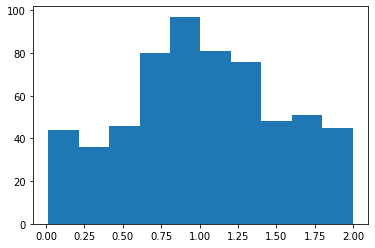

In [79]:
plt.hist(data)
plt.show()

$ln L = - (v_S + v_B) + \sum_{i=1}^n ln (\frac{4v_S}{erf(2\sqrt{2})\sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x_i-1}{\frac{1}{4}}\right)^2} + \frac{v_B}{2})$

In [80]:
def log_L(v_S, v_B, x_i):
    if v_S.ndim == 2:
        v_S_1d = v_S.T[0]
    else:
        v_S_1d = v_S
    log_L = -(v_S_1d + v_B) + np.sum(np.log((4*v_S)/(sp.special.erf(2*np.sqrt(2))*np.sqrt(2*np.pi)) * np.exp(-0.5*((x_i - 1)/0.25)**2) + v_B/2), axis = -1)
    return log_L

def func(params): 
    v_S = params
    v_B = 420.7
    data = pd.read_csv('ex9_data.csv')
    x = np.array(data).T[0]
    log_Like = log_L(v_S, v_B, x)
    return -1* log_Like

initial = np.array([200])

fit = optimize.minimize(func, initial)
v_S_est = fit.x[0]

print('v_S = ', v_S_est, ' events')

v_S =  179.31287716338284  events


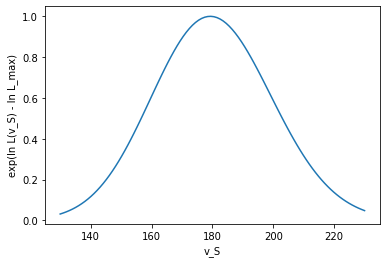

In [81]:
v_B = 420.7
data = pd.read_csv('ex9_data.csv')
x = np.array(data).T[0]
v_S_arr = np.linspace(130, 230, 100)
v_S_arr_2d = np.repeat(v_S_arr[:, np.newaxis], len(x), axis = 1)
x_2d = np.repeat(x[np.newaxis, :], len(v_S_arr), axis = 0)

log_Like = log_L(v_S_arr_2d, v_B, x_2d)
log_L_max = log_L(v_S_est, v_B, x)

plt.figure(1)
plt.plot(v_S_arr, np.exp(log_Like - log_L_max))
plt.xlabel('v_S')
plt.ylabel('exp(ln L(v_S) - ln L_max)')
plt.show()

Interpretation: The fraction of the posterior probability of a certain value of v_S and the maximum posterior probability

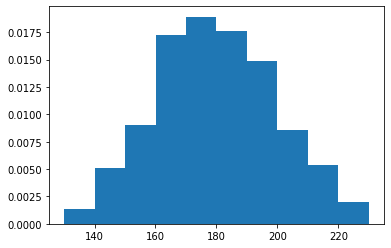

In [82]:
v_S_rand = np.random.uniform(low = 130, high = 230, size = 1000)
v_S_rand_arr_2d = np.repeat(v_S_rand[:, np.newaxis], len(x), axis = 1)
x_2d = np.repeat(x[np.newaxis, :], len(v_S_rand), axis = 0)

log_Like = log_L(v_S_rand_arr_2d, v_B, x_2d)
log_L_max = log_L(v_S_est, v_B, x)

hist_data = v_S_rand

plt.hist(hist_data, weights = np.exp(log_Like - log_L_max), density = True)
plt.show()

Interpretation: Gaussian

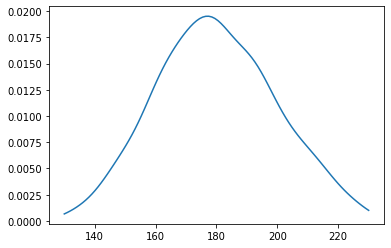

In [83]:
gaussian_kde = stats.gaussian_kde(v_S_rand, bw_method=None, weights=np.exp(log_Like - log_L_max))
pdf = gaussian_kde.pdf(np.linspace(130,230,100))
plt.plot(np.linspace(130,230,100), pdf)
plt.show()

v_S =  349.7371093989082  events


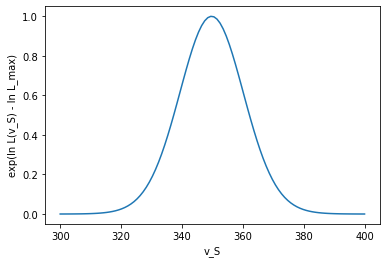

In [84]:
def log_L(v_S, v_B, x_i):
    if v_S.ndim == 2:
        v_S_1d = v_S.T[0]
    else:
        v_S_1d = v_S
    log_L = -(v_S_1d + v_B) + np.sum(np.log((4*v_S)/(sp.special.erf(2*np.sqrt(2))*np.sqrt(2*np.pi)) * np.exp(-0.5*((x_i - 1)/0.25)**2) + v_B/2), axis = -1)
    pi = 1/(np.sqrt(2*np.pi)*50) * np.exp(-0.5*((v_S_1d - 350)/50)**2)
    return log_L * pi

def func(params): 
    v_S = params
    v_B = 420.7
    data = pd.read_csv('ex9_data.csv')
    x = np.array(data).T[0]
    log_Like = log_L(v_S, v_B, x)
    return -1 * log_Like

initial = np.array([300])

fit = optimize.minimize(func, initial)
v_S_est = fit.x[0]

print('v_S = ', v_S_est, ' events')

v_B = 420.7
data = pd.read_csv('ex9_data.csv')
x = np.array(data).T[0]
v_S_arr = np.linspace(300, 400, 100)
v_S_arr_2d = np.repeat(v_S_arr[:, np.newaxis], len(x), axis = 1)
x_2d = np.repeat(x[np.newaxis, :], len(v_S_arr), axis = 0)

log_Like = log_L(v_S_arr_2d, v_B, x_2d)
log_L_max = log_L(v_S_est, v_B, x)

plt.figure(2)
plt.plot(v_S_arr, np.exp(log_Like - log_L_max))
plt.xlabel('v_S')
plt.ylabel('exp(ln L(v_S) - ln L_max)')
plt.show()

In [85]:
def log_L(v_S, v_B, x_i):
    if v_S.ndim == 2:
        v_S_1d = v_S.T[0]
    else:
        v_S_1d = v_S
    if v_B.ndim == 2:
        v_B_1d = v_B.T[0]
    else:
        v_B_1d = v_B
    log_L = -(v_S_1d + v_B_1d) + np.sum(np.log((4*v_S)/(sp.special.erf(2*np.sqrt(2))*np.sqrt(2*np.pi)) * np.exp(-0.5*((x_i - 1)/0.25)**2) + v_B/2), axis = -1)
    return log_L

def func(params): 
    v_S, v_B = params
    data = pd.read_csv('ex9_data.csv')
    x = np.array(data).T[0]
    log_Like = log_L(v_S, v_B, x)
    return -1 * log_Like

initial = np.array([300, 400])

fit = optimize.minimize(func, initial)
v_S_est = fit.x[0]
v_B_est = fit.x[1]

print('v_S = ', v_S_est, ' events')
print('v_B = ', v_B_est, ' events')

v_S =  175.37543755906563  events
v_B =  428.6269195910447  events


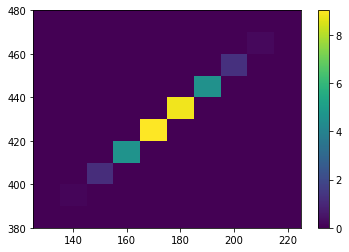

In [86]:
v_S_arr = np.linspace(125, 225, 100)
v_B_arr = np.linspace(380, 480, 100)
data = pd.read_csv('ex9_data.csv')
x = np.array(data).T[0]

v_S_arr_2d = np.repeat(v_S_arr[:, np.newaxis], len(x), axis = 1)
v_B_arr_2d = np.repeat(v_B_arr[:, np.newaxis], len(x), axis = 1)
x_2d = np.repeat(x[np.newaxis, :], len(v_S_arr), axis = 0)

log_L_max = log_L(v_S_est, v_B_est, x_2d)
weights = np.exp(log_L(v_S_arr_2d, v_B_arr_2d, x_2d) - log_L_max)   
    
plt.hist2d(v_S_arr, v_B_arr, weights = weights)
plt.colorbar()
plt.show()